In [253]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# training data preporcessing

In [254]:
df = pd.read_csv('data/raw/train_FD001.txt', sep=" ", header=None)

In [255]:
columns = [
    # Index Names
    "engine",   # Engine No.
    "cycle",    # Time, In Cycles

    # Setting Names
    "setting1",  # Operation Setting 1
    "setting2",  # Operation Setting 2
    "setting3",  # Operation Setting 3

    # Sensor Names (full names)
    "Fan Inlet Temperature (°K)",
    "LPC Outlet Temperature (°K)",
    "HPC Outlet Temperature (°K)",
    "LPT Outlet Temperature (°K)",
    "Fan Inlet Pressure (kPa)",
    "Bypass-Duct Pressure (kPa)",
    "HPC Outlet Pressure (kPa)",
    "Physical Fan Speed (rpm)",
    "Physical Core Speed (rpm)",
    "Engine Pressure Ratio (P50/P2)",
    "HPC Outlet Static Pressure (kPa)",
    "Ratio of Fuel Flow to Ps30 (m²/s)",
    "Corrected Fan Speed (rpm)",
    "Corrected Core Speed (rpm)",
    "Bypass Ratio",
    "Burner Fuel-Air Ratio",
    "Bleed Enthalpy",
    "Required Fan Speed",
    "Required Fan Conversion Speed",
    "High-Pressure Turbines Cool Air Flow",
    "Low-Pressure Turbines Cool Air Flow"
]


In [256]:
## Changing to SI units
df.iloc[:, 5] = df.iloc[:, 5] * (5/9)   # Fan Inlet Temperature Rankine to Kelvin
df.iloc[:, 6] = df.iloc[:, 6] * (5/9)   # LPC Outlet Temp Rankine to Kelvin
df.iloc[:, 7] = df.iloc[:, 7] * (5/9)   # HPC Outlet Temp Rankine to Kelvin
df.iloc[:, 8] = df.iloc[:, 8] * (5/9)   # LPT Outlet Temp Rankine to Kelvin
df.iloc[:, 9] = df.iloc[:, 9] * 6.89476     # Fan Inlet Pressure psia to kPa
df.iloc[:, 10] = df.iloc[:, 10] * 6.89476     # Bypass-Duct Pressure psia to kPa
df.iloc[:, 11] = df.iloc[:, 11] * 6.89476     # HPC Outlet Pressure psia to kPa
df.iloc[:, 15] = df.iloc[:, 15] * 6.89476     # HPC Outlet Static Pressure psia to kPa
df.iloc[:, 16] = df.iloc[:, 16] * 0.00064516  # Mass flow rate to LPC outlet converted from pps/psia to m²/s


In [257]:
# df.head()

In [258]:
# drop the last two columns which are empty
df = df.drop(columns=[26, 27])
df.columns = columns

In [259]:
# df.head()

In [260]:
# df.columns = columns

In [261]:
df.head()

,engine,cycle,setting1,setting2,setting3,Fan Inlet Temperature (°K),LPC Outlet Temperature (°K),HPC Outlet Temperature (°K),LPT Outlet Temperature (°K),Fan Inlet Pressure (kPa),...,Ratio of Fuel Flow to Ps30 (m²/s),Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow
0,1,1,-0.0007,-0.0004,100.0,288.15,356.566667,883.166667,778.111111,100.801391,...,0.336554,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,288.15,356.750000,884.344444,779.522222,100.801391,...,0.336954,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,288.15,356.861111,882.216667,780.111111,100.801391,...,0.337044,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,288.15,356.861111,879.327778,778.816667,100.801391,...,0.337328,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,288.15,356.872222,879.361111,781.233333,100.801391,...,0.336896,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


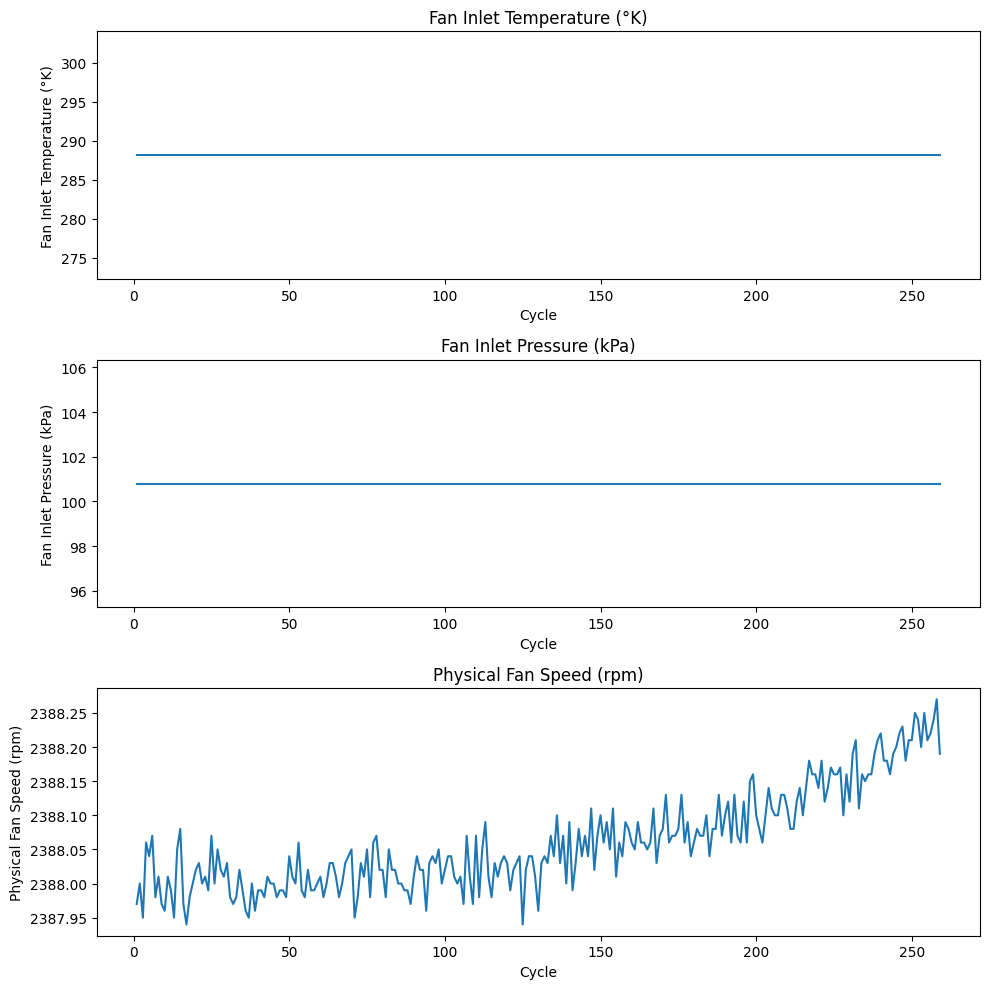

In [262]:
# plot all cycles for engine 1 for sensor "Fan Inlet Temperature (°R)", "Fan Inlet Pressure (psia)", "Physical Fan Speed (rpm)" in 3 subplots
engine_1 = df[df['engine'] == 7]

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(engine_1['cycle'], engine_1['Fan Inlet Temperature (°K)'])
axs[0].set_title('Fan Inlet Temperature (°K)')
axs[0].set_xlabel('Cycle')
axs[0].set_ylabel('Fan Inlet Temperature (°K)')
axs[1].plot(engine_1['cycle'], engine_1['Fan Inlet Pressure (kPa)'])
axs[1].set_title('Fan Inlet Pressure (kPa)')
axs[1].set_xlabel('Cycle')
axs[1].set_ylabel('Fan Inlet Pressure (kPa)')
axs[2].plot(engine_1['cycle'], engine_1['Physical Fan Speed (rpm)'])
axs[2].set_title('Physical Fan Speed (rpm)')
axs[2].set_xlabel('Cycle')
axs[2].set_ylabel('Physical Fan Speed (rpm)')
plt.tight_layout()
plt.show()

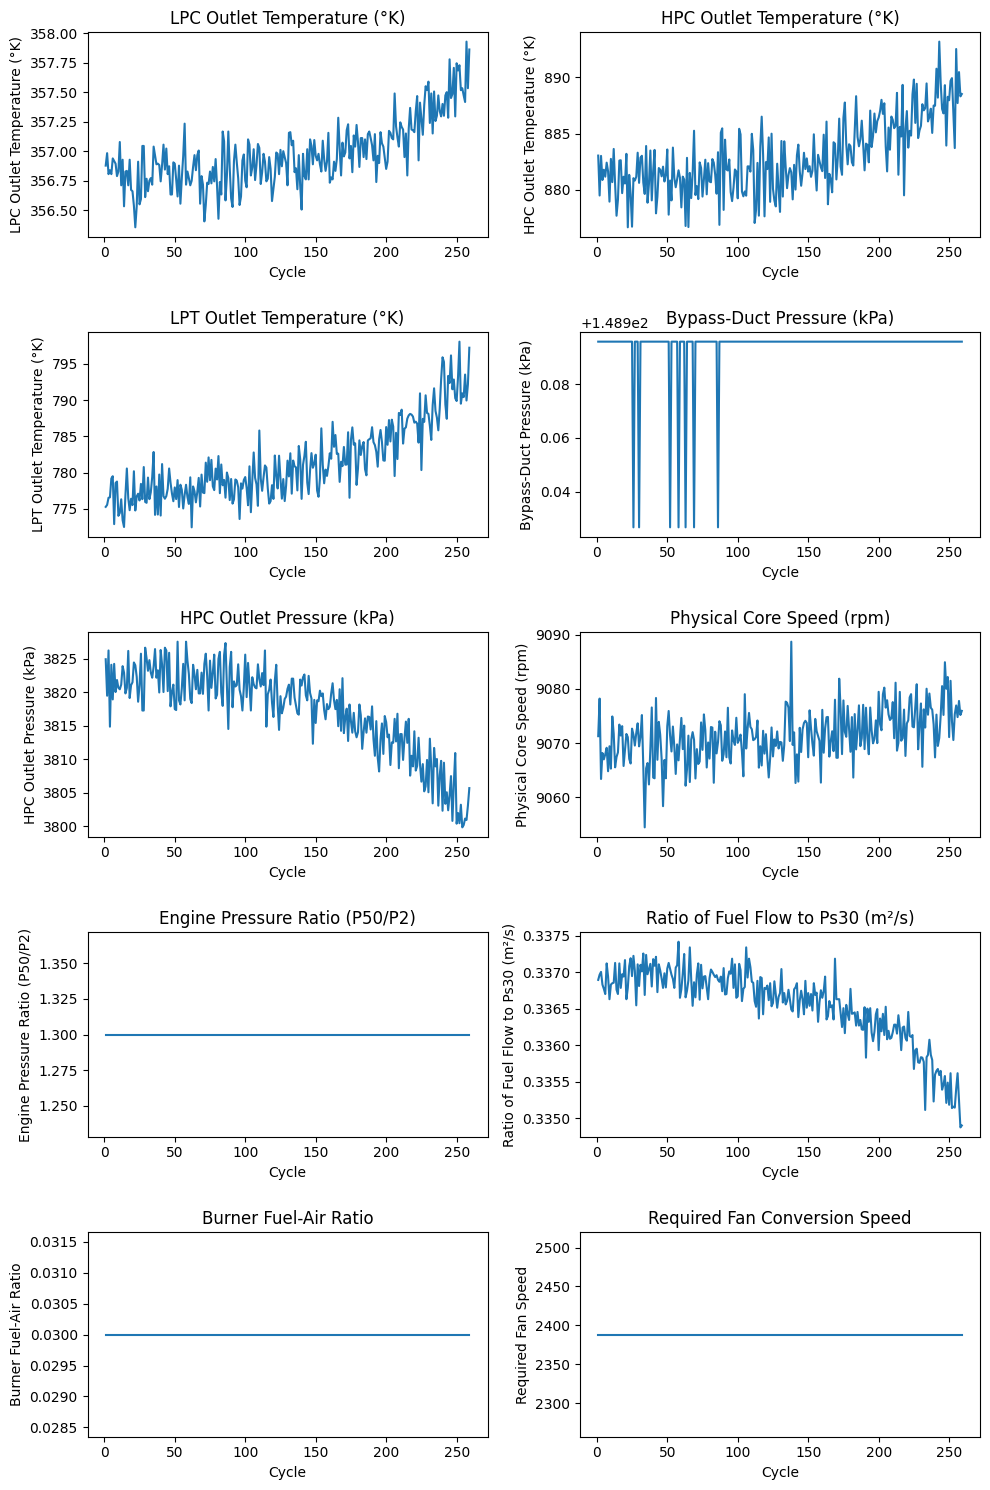

In [263]:
## Second lot of plotting to determine relationships
f, ax = plt.subplots(5,2, figsize = (10,15))
ax = ax.flatten()
ax[0].plot(engine_1['cycle'], engine_1['LPC Outlet Temperature (°K)'])
ax[0].set_title('LPC Outlet Temperature (°K)')
ax[0].set_xlabel('Cycle')
ax[0].set_ylabel('LPC Outlet Temperature (°K)')

ax[1].plot(engine_1['cycle'], engine_1['HPC Outlet Temperature (°K)'])
ax[1].set_title('HPC Outlet Temperature (°K)')
ax[1].set_xlabel('Cycle')
ax[1].set_ylabel('HPC Outlet Temperature (°K)')

ax[2].plot(engine_1['cycle'], engine_1['LPT Outlet Temperature (°K)'])
ax[2].set_title('LPT Outlet Temperature (°K)')
ax[2].set_xlabel('Cycle')
ax[2].set_ylabel('LPT Outlet Temperature (°K)')

ax[3].plot(engine_1['cycle'], engine_1['Bypass-Duct Pressure (kPa)'])
ax[3].set_title('Bypass-Duct Pressure (kPa)')
ax[3].set_xlabel('Cycle')
ax[3].set_ylabel('Bypass-Duct Pressure (kPa)')

ax[4].plot(engine_1['cycle'], engine_1['HPC Outlet Pressure (kPa)'])
ax[4].set_title('HPC Outlet Pressure (kPa)')
ax[4].set_xlabel('Cycle')
ax[4].set_ylabel('HPC Outlet Pressure (kPa)')

ax[5].plot(engine_1['cycle'], engine_1['Physical Core Speed (rpm)'])
ax[5].set_title('Physical Core Speed (rpm)')
ax[5].set_xlabel('Cycle')
ax[5].set_ylabel('Physical Core Speed (rpm)')

ax[6].plot(engine_1['cycle'], engine_1['Engine Pressure Ratio (P50/P2)'])
ax[6].set_title('Engine Pressure Ratio (P50/P2)')
ax[6].set_xlabel('Cycle')
ax[6].set_ylabel('Engine Pressure Ratio (P50/P2)')

ax[7].plot(engine_1['cycle'], engine_1['Ratio of Fuel Flow to Ps30 (m²/s)'])
ax[7].set_title('Ratio of Fuel Flow to Ps30 (m²/s)')
ax[7].set_xlabel('Cycle')
ax[7].set_ylabel('Ratio of Fuel Flow to Ps30 (m²/s)')

ax[8].plot(engine_1['cycle'], engine_1['Burner Fuel-Air Ratio'])
ax[8].set_title('Burner Fuel-Air Ratio')
ax[8].set_xlabel('Cycle')
ax[8].set_ylabel('Burner Fuel-Air Ratio')

ax[9].plot(engine_1['cycle'], engine_1['Required Fan Speed'])
ax[9].set_title('Required Fan Conversion Speed')
ax[9].set_xlabel('Cycle')
ax[9].set_ylabel('Required Fan Speed')

plt.tight_layout()
plt.show()


In [264]:
# add rul column to df
for engine in df['engine'].unique():
    engine_df = df[df['engine'] == engine]
    max_cycle = engine_df['cycle'].max()
    df.loc[df['engine'] == engine, 'RUL'] = max_cycle - engine_df['cycle']

In [265]:
df

,engine,cycle,setting1,setting2,setting3,Fan Inlet Temperature (°K),LPC Outlet Temperature (°K),HPC Outlet Temperature (°K),LPT Outlet Temperature (°K),Fan Inlet Pressure (kPa),...,Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow,RUL
0,1,1,-0.0007,-0.0004,100.0,288.15,356.566667,883.166667,778.111111,100.801391,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0
1,1,2,0.0019,-0.0003,100.0,288.15,356.750000,884.344444,779.522222,100.801391,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
2,1,3,-0.0043,0.0003,100.0,288.15,356.861111,882.216667,780.111111,100.801391,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
3,1,4,0.0007,0.0000,100.0,288.15,356.861111,879.327778,778.816667,100.801391,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
4,1,5,-0.0019,-0.0002,100.0,288.15,356.872222,879.361111,781.233333,100.801391,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,288.15,357.494444,887.766667,793.683333,100.801391,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4.0
20627,100,197,-0.0016,-0.0005,100.0,288.15,357.522222,891.388889,796.433333,100.801391,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3.0
20628,100,198,0.0004,0.0000,100.0,288.15,357.455556,890.255556,793.433333,100.801391,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2.0
20629,100,199,-0.0011,0.0003,100.0,288.15,357.350000,891.811111,792.516667,100.801391,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1.0


In [266]:
# export to csv
df.to_csv('data/processed/train_FD001_processed.csv', index=False)

# testing data preprocessing

In [267]:
df = pd.read_csv('data/raw/test_FD001.txt', sep=" ", header=None)

In [268]:
columns = [
    # Index Names
    "engine",   # Engine No.
    "cycle",    # Time, In Cycles

    # Setting Names
    "setting1",  # Operation Setting 1
    "setting2",  # Operation Setting 2
    "setting3",  # Operation Setting 3

    # Sensor Names (full names)
    "Fan Inlet Temperature (°K)",
    "LPC Outlet Temperature (°K)",
    "HPC Outlet Temperature (°K)",
    "LPT Outlet Temperature (°K)",
    "Fan Inlet Pressure (kPa)",
    "Bypass-Duct Pressure (kPa)",
    "HPC Outlet Pressure (kPa)",
    "Physical Fan Speed (rpm)",
    "Physical Core Speed (rpm)",
    "Engine Pressure Ratio (P50/P2)",
    "HPC Outlet Static Pressure (kPa)",
    "Ratio of Fuel Flow to Ps30 (m²/s)",
    "Corrected Fan Speed (rpm)",
    "Corrected Core Speed (rpm)",
    "Bypass Ratio",
    "Burner Fuel-Air Ratio",
    "Bleed Enthalpy",
    "Required Fan Speed",
    "Required Fan Conversion Speed",
    "High-Pressure Turbines Cool Air Flow",
    "Low-Pressure Turbines Cool Air Flow"
]


In [269]:
## Changing to SI units
df.iloc[:, 5] = df.iloc[:, 5] * (5/9)   # Fan Inlet Temperature Rankine to Kelvin
df.iloc[:, 6] = df.iloc[:, 6] * (5/9)   # LPC Outlet Temp Rankine to Kelvin
df.iloc[:, 7] = df.iloc[:, 7] * (5/9)   # HPC Outlet Temp Rankine to Kelvin
df.iloc[:, 8] = df.iloc[:, 8] * (5/9)   # LPT Outlet Temp Rankine to Kelvin
df.iloc[:, 9] = df.iloc[:, 9] * 6.89476     # Fan Inlet Pressure psia to kPa
df.iloc[:, 10] = df.iloc[:, 10] * 6.89476     # Bypass-Duct Pressure psia to kPa
df.iloc[:, 11] = df.iloc[:, 11] * 6.89476     # HPC Outlet Pressure psia to kPa
df.iloc[:, 15] = df.iloc[:, 15] * 6.89476     # HPC Outlet Static Pressure psia to kPa
df.iloc[:, 16] = df.iloc[:, 16] * 0.00064516  # Mass flow rate to LPC outlet converted from pps/psia to m²/s


In [270]:
df = df.drop(columns=[26, 27])
df.columns = columns

In [273]:
df = pd.read_csv("data/processed/test_FD001_processed.csv")

rul_df = pd.read_csv("data/raw/RUL_FD001.txt",
                     header=None, names=["final_rul"])
rul_df["engine"] = rul_df.index + 1

last_cycle = df.groupby("engine")["cycle"].max().rename("last_cycle").reset_index()

tmp = df.merge(last_cycle, on="engine", how="left").merge(rul_df, on="engine", how="left")

tmp["RUL"] = tmp["final_rul"] + (tmp["last_cycle"] - tmp["cycle"])

train_with_rul = tmp.drop(columns=["last_cycle", "final_rul"])

In [274]:
train_with_rul

,engine,cycle,setting1,setting2,setting3,Fan Inlet Temperature (°K),LPC Outlet Temperature (°K),HPC Outlet Temperature (°K),LPT Outlet Temperature (°K),Fan Inlet Pressure (kPa),...,Corrected Fan Speed (rpm),Corrected Core Speed (rpm),Bypass Ratio,Burner Fuel-Air Ratio,Bleed Enthalpy,Required Fan Speed,Required Fan Conversion Speed,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow,RUL
0,1,1,0.0023,0.0003,100.0,288.15,357.233333,880.716667,776.783333,100.801391,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,288.15,356.505556,882.472222,775.233333,100.801391,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,288.15,356.922222,881.633333,778.522222,100.801391,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,288.15,356.911111,880.066667,781.344444,100.801391,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,288.15,356.950000,881.772222,778.844444,100.801391,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,288.15,357.355556,888.583333,786.550000,100.801391,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,100.0,288.15,357.344444,886.494444,790.027778,100.801391,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,100.0,288.15,357.466667,885.083333,781.566667,100.801391,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,100.0,288.15,357.366667,886.105556,788.533333,100.801391,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,21


In [275]:
train_with_rul.to_csv('data/processed/test_FD001_processed.csv', index=False)